In [1]:
# TDMA and its variation, Ref: https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm
import numpy as np
import matplotlib.pyplot as plt

def Thomas(a, b, c, d):
    n = len(d)
    c_prime = c.copy()
    d_prime = d.copy()
    c_prime[0]= c[0] / b[0]
    d_prime[0] = d[0] / b[0]
    
    for i in range(1, n-1):
        denom = b[i] - a[i-1] * c_prime[i-1]
        c_prime[i] = c[i] / denom
        d_prime[i] = (d[i] - a[i-1] * d_prime[i-1]) / denom
    
    
    denom = b[-1] - a[-1] * c_prime[-1]
    d_prime[-1] = (d[-1] - a[-1] * d_prime[-2]) / denom
    
    x = np.zeros(n)
    x[-1] = d_prime[-1]
    for i in range(n-2, -1, -1):
        x[i] = d_prime[i] - c_prime[i] * x[i+1]
    return x


def Cyclic_Thomas(a, b, c, d):
    n = len(d)
    gamma = 0.8  
    
    
    u = np.zeros(n)
    u[0] = gamma
    u[-1] = c[-1]
    
    v = np.zeros(n)
    v[0] = 1
    v[-1] = a[0] / gamma
    
    
    a_mod = a[1:].copy()  
    b_mod = b.copy()
    b_mod[0] -= gamma
    b_mod[-1] -= c[-1] * a[0] / gamma
    c_mod = c[:-1].copy()  
    
    y = Thomas(a_mod, b_mod, c_mod, d)
    z = Thomas(a_mod, b_mod, c_mod, u)
    
    factor = (v[0]*y[0] + v[-1]*y[-1]) / (1 + v[0]*z[0] + v[-1]*z[-1])
    x = y - factor * z
    return x

In [18]:
# Euler Implicit Scheme and Upwind Scheme for First-order Linear Wave Equation
import numpy as np
import matplotlib.pyplot as plt

A = 1 
x_min, x_max = -0.5, 0.5 
L = x_max - x_min
Mx = 100 
dx = L / Mx
CFL = 0.5 
dt = CFL * dx / A
T = 0.1
Mt = int(T / dt)

x = np.linspace(x_min, x_max, Mx, endpoint=False)

U = np.zeros(x.shape)

def Initial_Condition(x):
    if -0.5 <= x and x < -0.25:
        return 0
    elif x >= -0.25 and x <= 0.25:
        return 1
    elif x > 0.25 and x <= 0.5:
        return 0
    else:
        print(x)
        raise ValueError("The spatial coordinate is out of the computatioanl domain.")
        
def EulerImplicit(U,T):
    Um = U.copy()
    alpha = 0.5 * CFL
    diag_upper = np.full(Mx, -alpha)
    diag = np.ones(Mx)
    diag_lower = np.full(Mx, alpha)
    for j in range(Mx):
        U[j] = Initial_Condition(x_min + j * dx)
    for n in range(int(T/dt)):
        Um = U.copy()
        U = Cyclic_Thomas(diag_upper, diag, diag_lower, Um)
    return U

def Upwind(U,T):
    Um = U.copy()
    for j in range(Mx):
        U[j] = Initial_Condition(x_min + j * dx)
    for n in range(int(T/dt)):
        Um = U.copy()
        for j in range(Mx):
            U[j] = Um[j] - CFL * Um[j] + CFL * Um[(j-1)%Mx]  # Periodical boundary condition used
    return U 





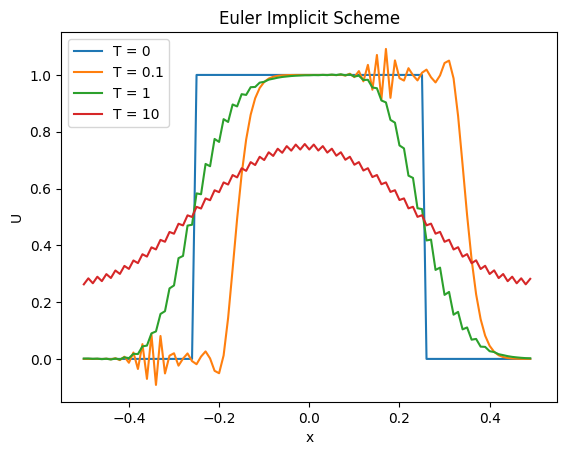

In [15]:
# Euler Implicit at different time

U0 = U.copy()
for j in range(Mx):
    U0[j] = Initial_Condition(x_min + j * dx)

U1 = EulerImplicit(U, 0.1)
U2 = EulerImplicit(U, 1.0)
U3 = EulerImplicit(U, 10)

fig, ax = plt.subplots() 

ax.plot(x, U0, label='T = 0')
ax.plot(x, U1, label='T = 0.1') 
ax.plot(x, U2, label='T = 1') 
ax.plot(x, U3, label='T = 10') 
ax.set_xlabel('x') 
ax.set_xlim(-0.55,0.55)
# ax.set_ylim(0,1.25)
ax.set_ylabel('U') 
ax.set_title('Euler Implicit Scheme') 
ax.legend() 

plt.show() 


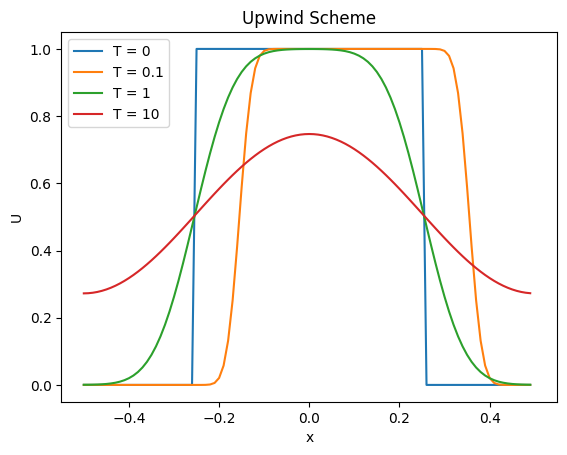

In [22]:
# Euler Implicit at different time

U0 = U.copy()
for j in range(Mx):
    U0[j] = Initial_Condition(x_min + j * dx)





fig, ax = plt.subplots() 

ax.plot(x, U0, label='T = 0')
U1 = Upwind(U, 0.1)
ax.plot(x, U1, label='T = 0.1') 
U2 = Upwind(U, 1.0)
ax.plot(x, U2, label='T = 1') 
U3 = Upwind(U, 10)
ax.plot(x, U3, label='T = 10') 
ax.set_xlabel('x') 
ax.set_xlim(-0.55,0.55)
# ax.set_ylim(0,1.25)
ax.set_ylabel('U') 
ax.set_title('Upwind Scheme') 
ax.legend() 

plt.show() 